In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 


# Inflation Analysis

In [3]:
df = pd.read_csv("InflationData.csv")

In [4]:
df.head(3)

,consumer_price_index_item,month_of_forecast,year_of_forecast,year_being_forecast,attribute,forecast_percent_change
0,All food,July,2002,2003,Lower bound of prediction interval,-0.2
1,Dairy products,August,2002,2003,Lower bound of prediction interval,-8.9
2,Dairy products,July,2002,2003,Upper bound of prediction interval,8.1


In [20]:
df.drop_duplicates().head()

,item,month,year,forecastYear,attribute,change
0,All food,July,2002,2003,Lower bound of prediction interval,-0.2
1,Dairy products,August,2002,2003,Lower bound of prediction interval,-8.9
2,Dairy products,July,2002,2003,Upper bound of prediction interval,8.1
3,Dairy products,July,2002,2003,Mid point of prediction interval,-1.2
4,Dairy products,July,2002,2003,Lower bound of prediction interval,-9.7


In [6]:
df.tail(3)

,consumer_price_index_item,month_of_forecast,year_of_forecast,year_being_forecast,attribute,forecast_percent_change
41621,Food at home,January,2023,2023,Mid point of prediction interval,8.0
41622,Food at home,January,2023,2023,Lower bound of prediction interval,4.5
41623,Food at home,March,2023,2023,Lower bound of prediction interval,5.3


In [7]:
df.shape

(41624, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41624 entries, 0 to 41623
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   consumer_price_index_item  41624 non-null  object 
 1   month_of_forecast          41624 non-null  object 
 2   year_of_forecast           41624 non-null  int64  
 3   year_being_forecast        41624 non-null  int64  
 4   attribute                  41624 non-null  object 
 5   forecast_percent_change    41621 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
df.rename(axis=1, mapper={"consumer_price_index_item": "item"}, inplace=True)

In [10]:
df.isnull().sum()

item                       0
month_of_forecast          0
year_of_forecast           0
year_being_forecast        0
attribute                  0
forecast_percent_change    3
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.head(3)

,item,month_of_forecast,year_of_forecast,year_being_forecast,attribute,forecast_percent_change
0,All food,July,2002,2003,Lower bound of prediction interval,-0.2
1,Dairy products,August,2002,2003,Lower bound of prediction interval,-8.9
2,Dairy products,July,2002,2003,Upper bound of prediction interval,8.1


In [13]:
df.rename(axis=1, mapper={"forecast_percent_change": "change", "month_of_forecast":"month"}, inplace=True)

In [14]:
df.rename(axis=1, mapper={"year_of_forecast":"year", "year_being_forecast":"forecastYear"}, inplace=True)

In [15]:
df.set_index("item").head()

,month,year,forecastYear,attribute,change
item,,,,,
All food,July,2002,2003,Lower bound of prediction interval,-0.2
Dairy products,August,2002,2003,Lower bound of prediction interval,-8.9
Dairy products,July,2002,2003,Upper bound of prediction interval,8.1
Dairy products,July,2002,2003,Mid point of prediction interval,-1.2
Dairy products,July,2002,2003,Lower bound of prediction interval,-9.7


In [16]:
df['item'].unique()

array(['All food', 'Dairy products', 'Eggs', 'Fish and seafood',
       'Fruits and vegetables', 'Fats and oils', 'Other meats', 'Pork',
       'Beef and veal', 'Poultry', 'Nonalcoholic beverages',
       'Cereals and bakery products', 'Sugar and sweets', 'Other foods',
       'Fresh fruits', 'Fresh fruits and vegetables', 'Fresh vegetables',
       'Meats, poultry, and fish', 'Food at home', 'Meats',
       'Food away from home', 'Fresh fruits & vegetables',
       'Processed fruits & vegetables', 'Processed fruits and vegetables'],
      dtype=object)

<Axes: xlabel='forecastYear', ylabel='change'>

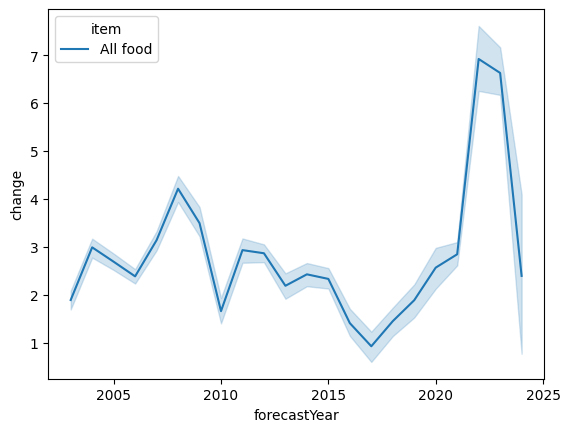

In [17]:
line = df[['item','forecastYear', 'change']]

line = line[line['item'].isin(['All food'])]
sns.lineplot(data=line, x='forecastYear', y='change', hue='item')

<Axes: xlabel='forecastYear', ylabel='change'>

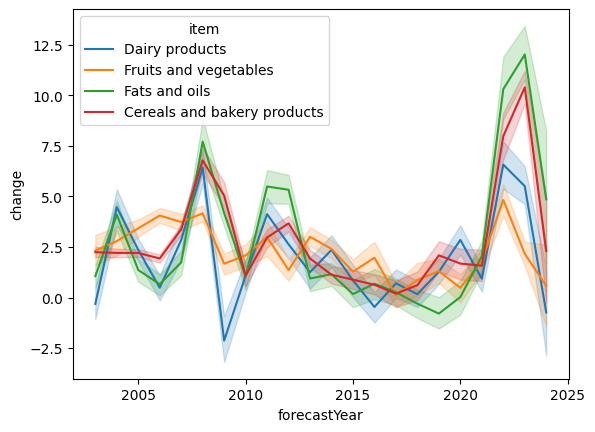

In [18]:

line2 = df[['item', 'forecastYear', 'change']]
line2 = line2[line2['item'].isin(['Dairy products', 'Fats and oils', 'Fruits and vegetables', 'Cereals and bakery products' ])]


sns.lineplot(data=line2, x='forecastYear', y='change', hue='item')

<Axes: xlabel='forecastYear', ylabel='change'>

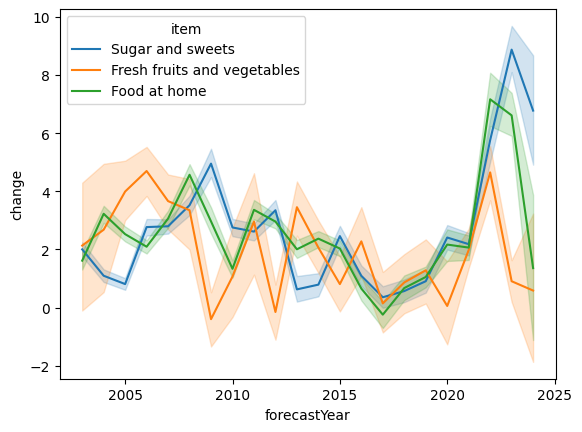

In [19]:
line3 = df[['item', 'forecastYear', 'change']]
line3 = line3[line3['item'].isin(['Sugar and sweets', 'Fresh fruits and vegetables', 'Food at home' ])]


sns.lineplot(data=line3, x='forecastYear', y='change', hue='item')